<div class="alert alert-block alert-info" style="margin-top: 20px; background-color:#DCDCDC">
<strong>Classification</strong> Find what class a sample belongs to.
</div>

# Decision Trees (Classification)

## Overview

- [Description](#Description)  
    - [Background](#Background)
    - [Example](#Example)
    - [Likelihood and Cost Function](#Likelihood-and-Cost-Function)
    - [Regularization](#Regularization)
- [Logistic Regression](#Logistic-Regression)
- [EXAMPLE - Decision Boundaries Visualization](#EXAMPLE---Decision-Boundaries-Visualization)

## Description

Decision trees are a supervised, probabilistic, machine learning classifier that are often used as decision support tools.

A decision tree is a graphical representation that makes use of branching methodology to exemplify all possible outcomes of a decision, based on certain conditions. In a decision tree, the internal node represents a test on the attribute, each branch of the tree represents the outcome of the test and the leaf node represents a particular class label i.e. the decision made after computing all of the attributes. The classification rules are represented through the path from root to the leaf node.

These machine learning algorithms help make decisions under uncertainty and help you improve communication, as they present a visual representation of a decision situation. Decision tree machine learning algorithms help a data scientist capture the idea that if a different decision was taken, then how the operational nature of a situation or model would have changed intensely.

Decision tree algorithms help make optimal decisions by allowing a data scientist to traverse through forward and backward calculation paths.

Decision trees are robust to errors and if the training data contains errors- decision tree algorithms will be best suited to address such problems.

Decision trees are best suited for problems where instances are represented by attribute value pairs. If the training data has missing value then decision trees can be used, as they can handle missing values nicely by looking at the data in other columns.

Decision trees are best suited when the target function has discrete output values.

Decision trees are very instinctual and can be explained to anyone with ease. People from a non-technical background, can also decipher the hypothesis drawn from a decision tree, as they are self-explanatory.

When using decision tree machine learning algorithms, data type is not a constraint as they can handle both categorical and numerical variables.

Decision tree machine learning algorithms do not require making any assumption on the linearity in the data and hence can be used in circumstances where the parameters are non-linearly related. These machine learning algorithms do not make any assumptions on the classifier structure and space distribution.

These algorithms are useful in data exploration. Decision trees implicitly perform feature selection which is very important in predictive analytics. When a decision tree is fit to a training dataset, the nodes at the top on which the decision tree is split, are considered as important variables within a given dataset and feature selection is completed by default.

Decision trees help save data preparation time, as they are not sensitive to missing values and outliers. Missing values will not stop you from splitting the data for building a decision tree. Outliers will also not affect the decision trees as data splitting happens based on some samples within the split range and not on exact absolute values.

**Drawbacks of Using Decision Tree Machine Learning Algorithms**

The more the number of decisions in a tree, less is the accuracy of any expected outcome.
A major drawback of decision tree machine learning algorithms, is that the outcomes may be based on expectations. When decisions are made in real-time, the payoffs and resulting outcomes might not be the same as expected or planned. There are chances that this could lead to unrealistic decision trees leading to bad decision making. Any irrational expectations could lead to major errors and flaws in decision tree analysis, as it is not always possible to plan for all eventualities that can arise from a decision.

Decision Trees do not fit well for continuous variables and result in instability and classification plateaus.

Decision trees are easy to use when compared to other decision making models but creating large decision trees that contain several branches is a complex and time consuming task.
Decision tree machine learning algorithms consider only one attribute at a time and might not be best suited for actual data in the decision space. Large sized decision trees with multiple branches are not comprehensible and pose several presentation difficulties.

### Background

Using the decision algorithm, we start at the tree root and split the data on the feature that results in the largest **information gain**. In an iterative process, we can then repeat this splitting procedure at each child node until the leaves are pure. This means that the samples at each node all belong to the same class. In practice, this can result in a very deep tree with many nodes, which can easily lead to *overfitting*. Thus, we tipically want to *prune* the tree by setting a limit for the maximal depth of the tree.

In order to split the nodes at the most informative features, we need to define an objective function that we want to optimize via the tree learning algorithm. Here, our objective function is to maximize the **information gain** at each split

$$IG(D_p,f) = I(D_p) - \sum_{j=1}^m\frac{N_j}{N_p}I(D_j)$$

where:

- $f$ is the feature to perfom the split
- $D_p$ and $D_j$ are the dataset of the parent and $j$th child
- $I$ is our impurity measure
- $N_p$ is the total number of samples at the parent node
- $N_j$ is the number of samples at the $j$th child node

As a result, the **information gain** $IG(D_p,f)$ is simply the difference between the impurity of the parent node and the sum of the child node impurities.

However, for simplicity to reduce the combinatorial search space, most libraries implement binary decision trees. This means that each parent node is split into two child nodes, $D_{left}$ and $D_{right}$

$$IG(D_p,f) = I(D_p) - \frac{N_{left}}{N_p}I(D_{left}) - \frac{N_{right}}{N_p}I(D_{right})$$

The three impurity measures or splitting criteria that are commonly used in binary decicion trees are:

- Giny Impuriy $I_G$
- Entropy $I_H$
- Classification Error $I_E$

#### Entropy

Let's start with the definition of entropy for all non-empty classes $p(i \mid t)\ne0$

$$I_H(t) = - \sum_{i=1}^c p(i \mid t) log_2 p(i \mid t)$$

where $p(i \mid t)$ is the proportion of samples that belong to class $i$ for a particular node $t$. The entropy is therefore 0 if all samples at a node belong to the same class, and the entropy is maximal if we have a uniform class distribution.

Higher entropy means there is more unpredictability in the events being measures. Higher entropy means that the events being measured are less predictibble (100% predictability = 0 entropy).

#### Gini Impurity

Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset.

The Gini impurity can be understood as a criterion to minimize the probability of misclassification

$$I_G(t) = \sum_{i=1}^c p(i \mid t)(1 - p(i \mid t)) = 1 - \sum_{i=1}^c p(i \mid t)^2$$

Similar to the entropy, the Gini impurity is maximal if the classes are perfectly mixed.

However, in practice both the Gini impurity and entropy typically yield very similar results and it is often not worth spending much time on evaluating trees using different impurity criteria rather than experimenting with different pruning cut-offs.

#### Classifcation Error

Another impurity measure is the classification error:

$$I_E(t) = 1 - max(p(i \mid t))$$

This is a useful criterion for pruning but not reccomended for growing a decision tree, since it is less sensitive to changes in the class probabilities of the nodes.

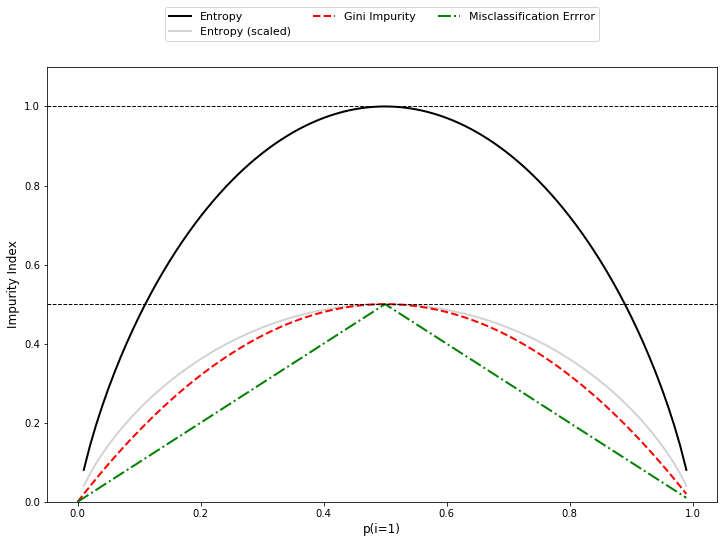

In [8]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def gini(p):
    return (p)*(1-p) + (1-p)*(1-(1-p))

def entropy(p):
    return - p*np.log2(p) - (1-p)*np.log2(1-p)

def error(p):
    return 1 - np.max([p, 1-p])

x = np.arange(0.0, 1, 0.01)
ent = [entropy(p) if p !=0 else None for p in x]
sc_ent = [e*0.5 if e else None for e in ent]
err = [error(i) for i in x]

plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11
fig = plt.figure()
ax = plt.subplot(111)

for i, lab, ls, c, in zip([ent, sc_ent, gini(x), err],
                          ['Entropy', 'Entropy (scaled)', 'Gini Impurity', 'Misclassification Errror'],
                          ['-', '-', '--', '-.'],
                          ['black', 'lightgray', 'red', 'green', 'cyan']):
    line = ax.plot(x, i, label=lab, linestyle=ls, lw=2, color=c)
ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=3, fancybox=True, shadow=False)
ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1, linewidth=1, color='k', linestyle='--')
plt.ylim([0, 1.1])
plt.xlabel('p(i=1)')
plt.ylabel('Impurity Index')
plt.show()

### Example

Using the weather data to illustrate how a decision tree works.

<table><tr>
<th>Outlook</th>
<th>Temperature</th>
<th>Humidity</th>
<th>Windy</th>
<th>Play</th>
</tr>
<tr>
<td>overcast</td>
<td>hot</td>
<td>high</td>
<td>false</td>
<td>yes</td>
</tr>
<tr>
<td>overcast</td>
<td>cool</td>
<td>normal</td>
<td>true</td>
<td>yes</td>
</tr>
<tr>
<td>overcast</td>
<td>mild</td>
<td>high</td>
<td>true</td>
<td>yes</td>
</tr>
<tr>
<td>overcast</td>
<td>hot</td>
<td>normal</td>
<td>false</td>
<td>yes</td>
</tr>
<tr>
<td>rainy</td>
<td>mild</td>
<td>high</td>
<td>false</td>
<td>yes</td>
</tr>
<tr>
<td>rainy</td>
<td>cool</td>
<td>normal</td>
<td>false</td>
<td>yes</td>
</tr>
<tr>
<td>rainy</td>
<td>cool</td>
<td>normal</td>
<td>true</td>
<td>no</td>
</tr>
<tr>
<td>rainy</td>
<td>mild</td>
<td>normal</td>
<td>false</td>
<td>yes</td>
</tr>
<tr>
<td>rainy</td>
<td>mild</td>
<td>high</td>
<td>true</td>
<td>no</td>
</tr>
<tr>
<td>sunny</td>
<td>hot</td>
<td>high</td>
<td>false</td>
<td>no</td>
</tr>
<tr>
<td>sunny</td>
<td>hot</td>
<td>high</td>
<td>true</td>
<td>no</td>
</tr>
<tr>
<td>sunny</td>
<td>mild</td>
<td>high</td>
<td>false</td>
<td>no</td>
</tr>
<tr>
<td>sunny</td>
<td>cool</td>
<td>normal</td>
<td>false</td>
<td>yes</td>
</tr>
<tr>
<td>sunny</td>
<td>mild</td>
<td>normal</td>
<td>true</td>
<td>yes</td>
</tr>
</table>

Consider an example data set with four attributes: *outlook* (sunny, overcast, rainy), *temperature* (hot, mild, cool), *humidity* (high, normal), and *windy* (true, false), with a binary (yes or no) target variable, *play*, and 14 data points. To construct a decision tree on this data, we need to compare the information gain of each of four trees, each split on one of the four features. The split with the highest information gain will be taken as the first split and the process will continue until all children nodes are pure, or until the information gain is 0.

The split using the feature *windy* results in two children nodes, one for a windy value of true and one for a windy value of false. In this data set, there are six data points with a true windy value, three of which have a play value of yes and three with a play value of no. The eight remaining data points with a windy value of false contain two no's and six yes's.

##### Using **entropy**:

- For the node where windy=true there were 6 data points, 3 are yes and 3 are no

 $$I_H([3,3]) = - (3/6) log_2 (3/6) - (3/6) log_2 (3/6) = 1$$


- For the node where windy=false there were 8 data points, 6 are yes and 2 are no

$$I_H([6,2]) = - (6/8) log_2 (6/8) - (2/8) log_2 (2/8) = 0.811$$

To find the information of the split, we take the weighted average of these numbers based on how many observations fell into which node.

$$\sum_{j=1}^m\frac{N_j}{N_p}I(D_j) = I_H([3,3],[6,2]) = (6/14) * 1 + (8/14) * 0.811 = 0.89216$$

To find the information of the split using *windy*, we must first calculate the information in the data before the split. The original data contained nine yes's and five no's

$$I_H([9,5]) = - (9/14) log_2 (9/14) - (5/14) log_2 (5/14) = 0.94028$$

Now we can calculate the **information gain**

$$IG(D_p,f) = I(D_p) - \sum_{j=1}^m\frac{N_j}{N_p}I(D_j) = 0.94038 - 0.89216 = 0.048127$$

To build the tree, the information gain of each possible first split would need to be calculated. The best first split is the one that provides the most information gain.

##### Using **gini impurity**

$$I_G([3,3]) = 1 - ((3/6)^2 + (3/6)^2) = 0.5$$
$$I_G([6,2]) = 1 - ((6/8)^2 + (2/6)^2) = 0.375$$

$$\sum_{j=1}^m\frac{N_j}{N_p}I(D_j) = I_G([3,3],[6,2]) = (6/14) * 0.5 + (8/14) * 0.375 = 0.42857$$

$$I_G([9,5]) = 1 - ((9/14)*2 + (5/14)^2) = 0,45918$$

Now we can calculata the **information gain**

$$IG(D_p,f) = I(D_p) - \sum_{j=1}^m\frac{N_j}{N_p}I(D_j) = 0,45918 - 0.4285 = 0.030612$$






## Decision Tree

[DecisionTree](http://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html#sklearn.tree.DecisionTreeClassifier) is a class capable of performing multi-class classification on a dataset.

Some features:

- It supports multi-class classification.
- It requires little data preparation (other techniques often require data normalisation, dummy variables need to be created and blank values to be removed)
- It is able to handle both numerical and categorical data.

<div class="alert alert-block alert-info" style="margin-top: 20px">
<strong>DecisionTreeClassifier</strong> (criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_split=1e-07, class_weight=None, presort=False)
<br/>
Parameters:
<ul>
<li>criterion: the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain</li>
<li>splitter: the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split</li>
<li>max_depth: the maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples</li>
<li>min_samples_split: the minimum number of samples required to split an internal node</li>
<li>min_samples_leaf: the minimum number of samples required to be at a leaf node</li>
</ul>
</div>

In [9]:
# load libraries and set plot parameters
import numpy as np
import pandas as pd
# import PrettyTable as pt

import matplotlib.pyplot as plt
%matplotlib inline

# plots configuration
# plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 8
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['legend.fontsize'] = 11

In [10]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

dataset = load_iris()
print(dataset['DESCR'])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [11]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df['class'] = pd.Series(dataset.target, name='class')
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667,1.000000
std,0.828066,0.433594,1.764420,0.763161,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
X = df.drop('class', axis=1)
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=7)

In [14]:
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=0, splitter='best')

In [15]:
tree.classes_

array([0, 1, 2])

In [16]:
# feature_importances_
# The higher, the more important the feature. 
# The importance of a feature is computed as the (normalized) total reduction 
# of the criterion brought by that feature. It is also known as the Gini importance
tree.feature_importances_

array([ 0.        ,  0.        ,  0.34495365,  0.65504635])

In [18]:
print('Accuracy: {0}'.format(tree.score(X_test, y_test)))
y_pred = tree.predict(X_test)
print('Number of milabeled points: {0}'.format((y_test!=y_pred).sum()))

Accuracy: 0.8888888888888888
Number of milabeled points: 5


## EXAMPLE - Decision Boundaries Visualization

For visualization purposes we will choose two features: petal widh and petal length

### Using Entropy for calculating Information Gain

In [19]:
from modules import plot_decision_regions

X = df.drop(labels=['class','sepal length (cm)', 'sepal width (cm)'], axis=1)
y = df['class']
X.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


Accuracy: 0.9777777777777777
Number of mislabeled points: 1


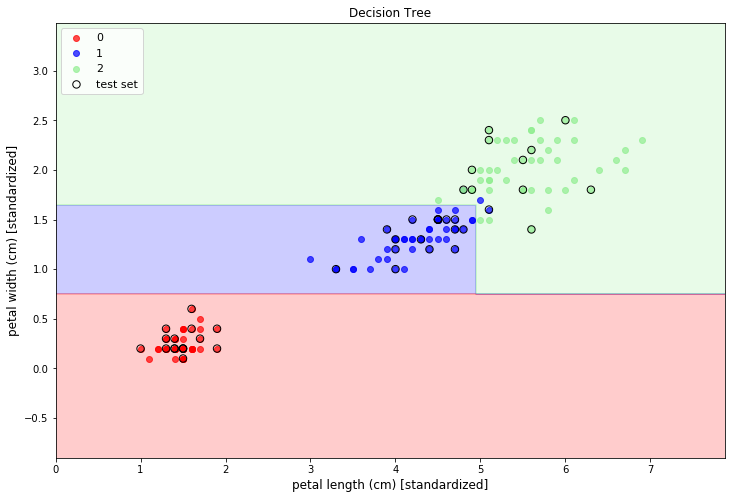

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

tree = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
tree.fit(X_train, y_train)

plot_decision_regions(X_train, X_test, y_train, y_test, classifier=tree, test_marker=True)
plt.title('Decision Tree')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

### Visualizing the TREE

In [25]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file='tree.dot', feature_names=['petal length', 'petal width'])

<img src="images/tree.png">

### Using Entropy for calculating Information Gain

Accuracy: 0.9777777777777777
Number of mislabeled points: 1


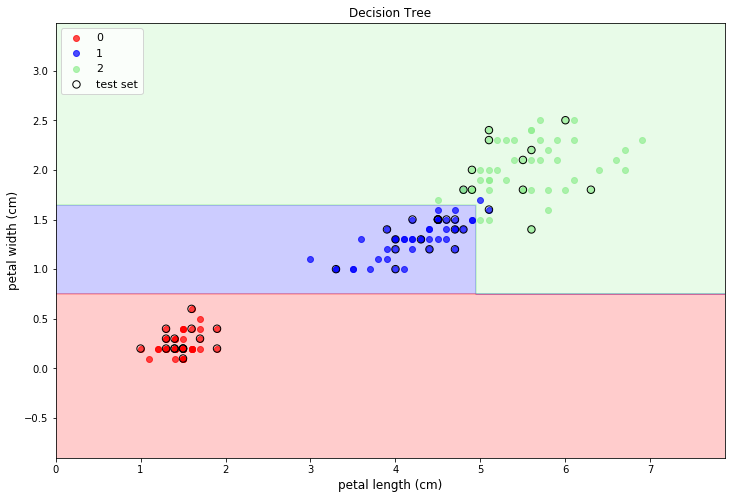

In [27]:
tree2 = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree2.fit(X_train, y_train)

plot_decision_regions(X_train, X_test, y_train, y_test, classifier=tree2, test_marker=True)
plt.title('Decision Tree')
plt.xlabel('petal length (cm)')
plt.ylabel('petal width (cm)')

In [28]:
export_graphviz(tree2, out_file='tree2.dot', feature_names=['petal length', 'petal width'])

<img src="images/tree2.png">